In [5]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
connection = mysql.connector.connect(
host='localhost',
user='root',
password= 'Kratika@#1912',
database='ecommerce_data_analysis'
)


In [15]:
cursor = connection.cursor()

In [17]:
cursor.execute('SELECT * FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [19]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [21]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [23]:
print("Customer Data:")
customer_data.head()

Customer Data:


,customer_id,name,city,email,phone_no,address,pin_code
0,CUST001,John Doe,New York,johndoe@gmail.com,1234567890,123 Main St,10001
1,CUST002,Jane Smith,Los Angeles,janesmith@yahoo.com,2345678901,456 Elm St,90001
2,CUST003,Robert Brown,Chicago,robertbrown@hotmail.com,3456789012,789 Oak St,60601
3,CUST004,Emily Davis,Houston,emilydavis@gmail.com,4567890123,101 Pine St,77001
4,CUST005,Michael Wilson,Phoenix,michaelwilson@yahoo.com,5678901234,202 Maple St,85001


In [25]:
print("\nProduct Data:")
product_data.head()


Product Data:


,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,PROD001,Samsung Galaxy S21,Electronics,Mobile Phones,799.99,699.99,50
1,PROD002,Apple iPhone 12,Electronics,Mobile Phones,899.99,799.99,30
2,PROD003,Dell XPS 13,Electronics,Laptops,999.99,899.99,20
3,PROD004,Sony WH-1000XM4,Electronics,Headphones,349.99,299.99,100
4,PROD005,Apple MacBook Air,Electronics,Laptops,1099.99,999.99,15


In [27]:
print("\nOrder Data:")
order_data.head()


Order Data:


,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,CUST001,PROD001,1.0,699.99,Credit Card,2024-08-01 10:00:00,Shipped
1,2,CUST002,PROD002,2.0,1599.98,Debit Card,2024-08-02 11:30:00,Delivered
2,3,CUST003,PROD003,1.0,899.99,PayPal,2024-08-03 12:15:00,Processing
3,4,CUST004,PROD004,3.0,899.97,Credit Card,2024-08-04 13:45:00,Shipped
4,5,CUST005,PROD005,1.0,999.99,Debit Card,2024-08-05 14:30:00,Delivered


In [29]:
print("\nMissing Values:")
print(customer_data.isna().sum())
print(product_data.isna().sum())
print(order_data.isna().sum())


Missing Values:
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [31]:
print("\nData Types:")
print(customer_data.dtypes)
print(product_data.dtypes)
print(order_data.dtypes)


Data Types:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [61]:
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
Q1 = order_data['quantity'].quantile(0.25)
Q3 = order_data['quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

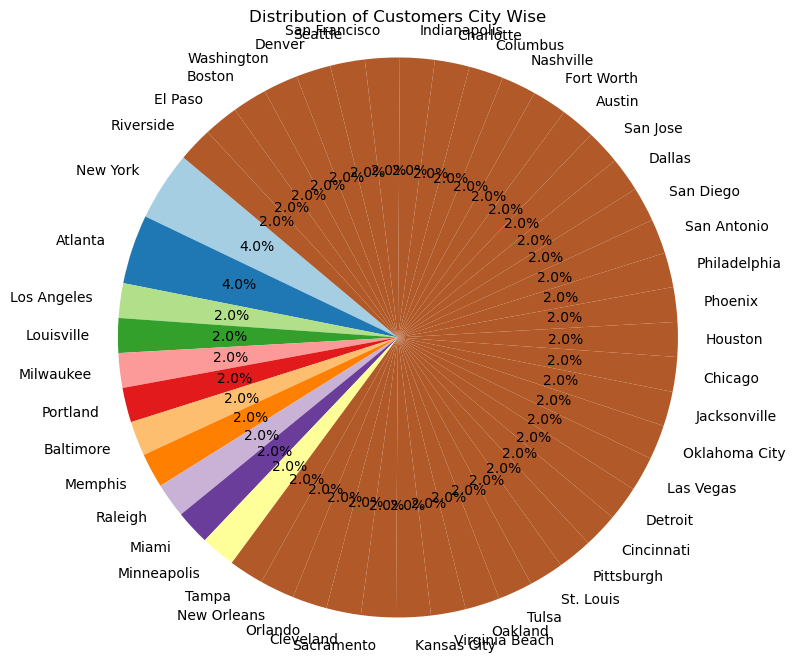

In [69]:
import matplotlib.pyplot as plt

# Calculate the total number of customers city wise
customers_city_wise = customer_data['city'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(customers_city_wise, labels=customers_city_wise.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(customers_city_wise))))
plt.title('Distribution of Customers City Wise')
plt.axis('equal')
plt.show()



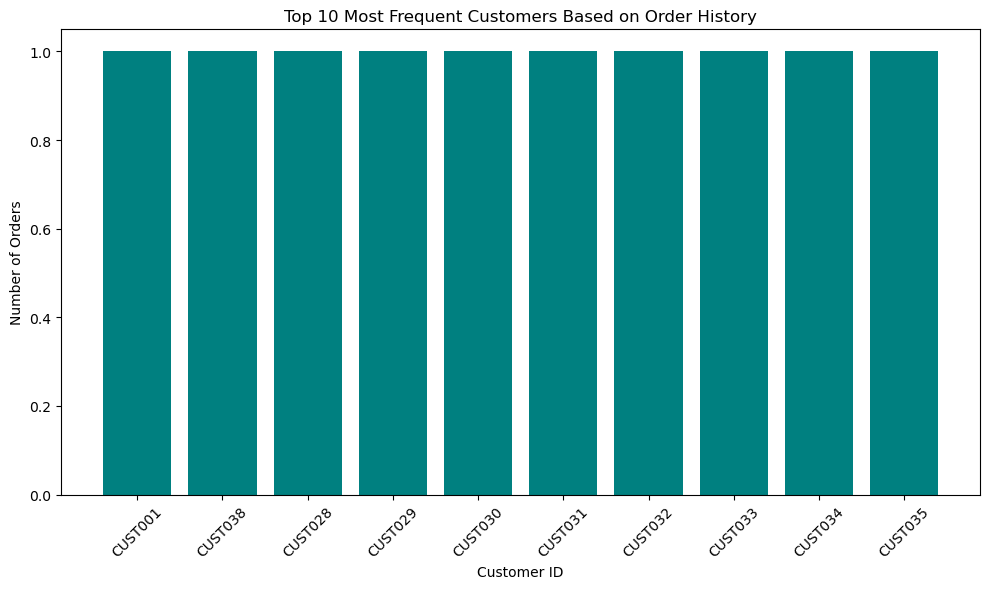

In [71]:

customer_order_counts = order_data['customer_id'].value_counts().nlargest(10)
# Plotting the bar graph for the most frequent customers
plt.figure(figsize=(10, 6))
plt.bar(customer_order_counts.index, customer_order_counts.values, color='teal')
plt.title('Top 10 Most Frequent Customers Based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


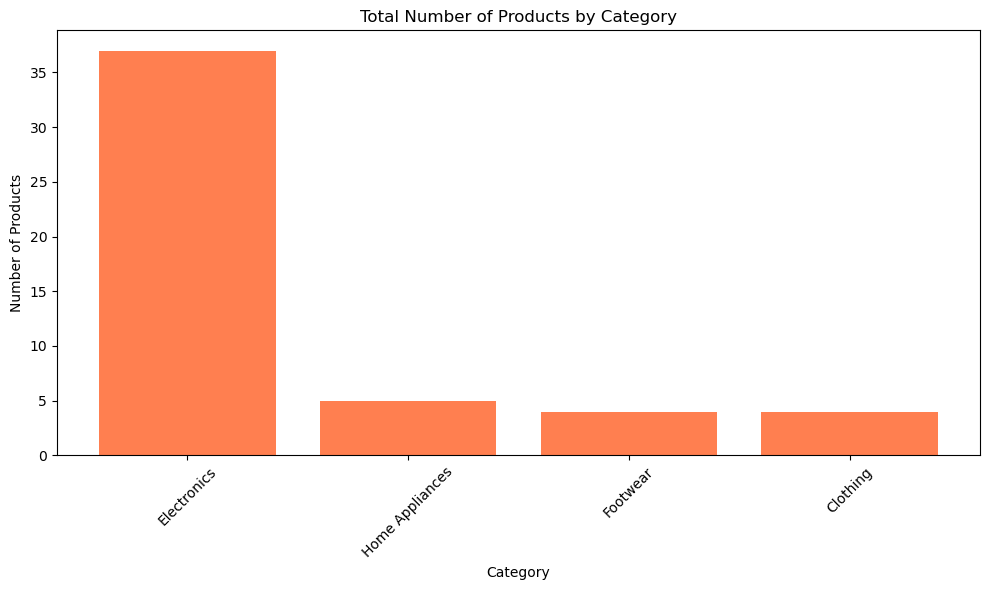

In [73]:
# Calculate the total number of products by category
products_by_category = product_data['category'].value_counts()
# Plotting the bar graph for the total number of products by category
plt.figure(figsize=(10, 6))
plt.bar(products_by_category.index, products_by_category.values, color='coral')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


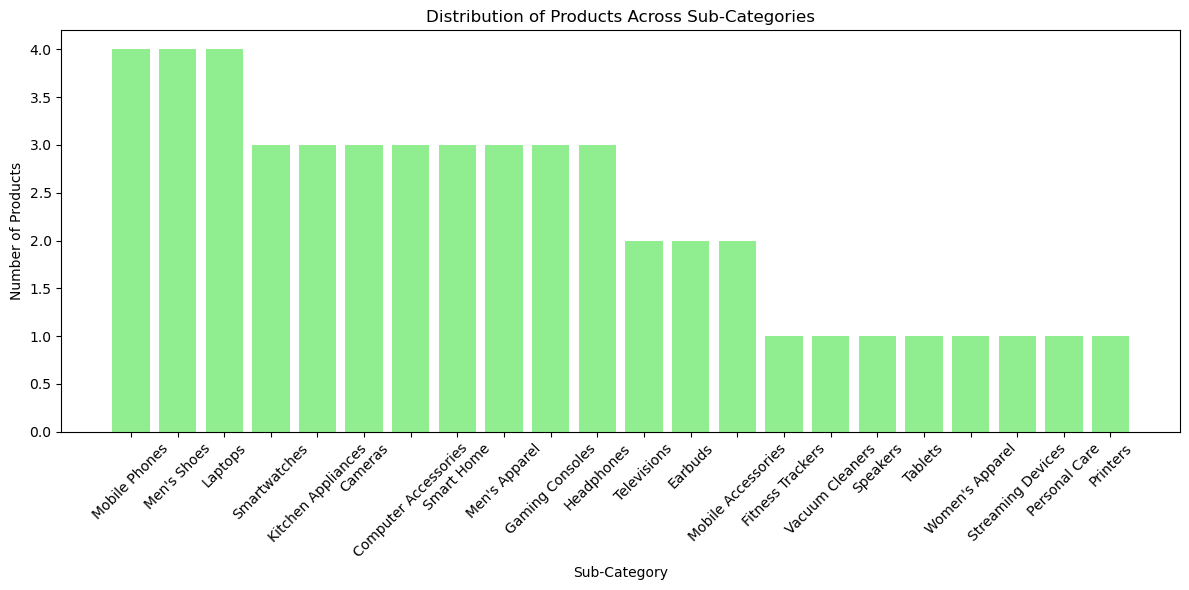

In [81]:

# Calculate the total number of products by sub-category
products_by_sub_category = product_data['sub_category'].value_counts()
# Plotting the bar graph for the total number of products by sub-category
plt.figure(figsize=(12, 6))
plt.bar(products_by_sub_category.index, products_by_sub_category.values, color='lightgreen')
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


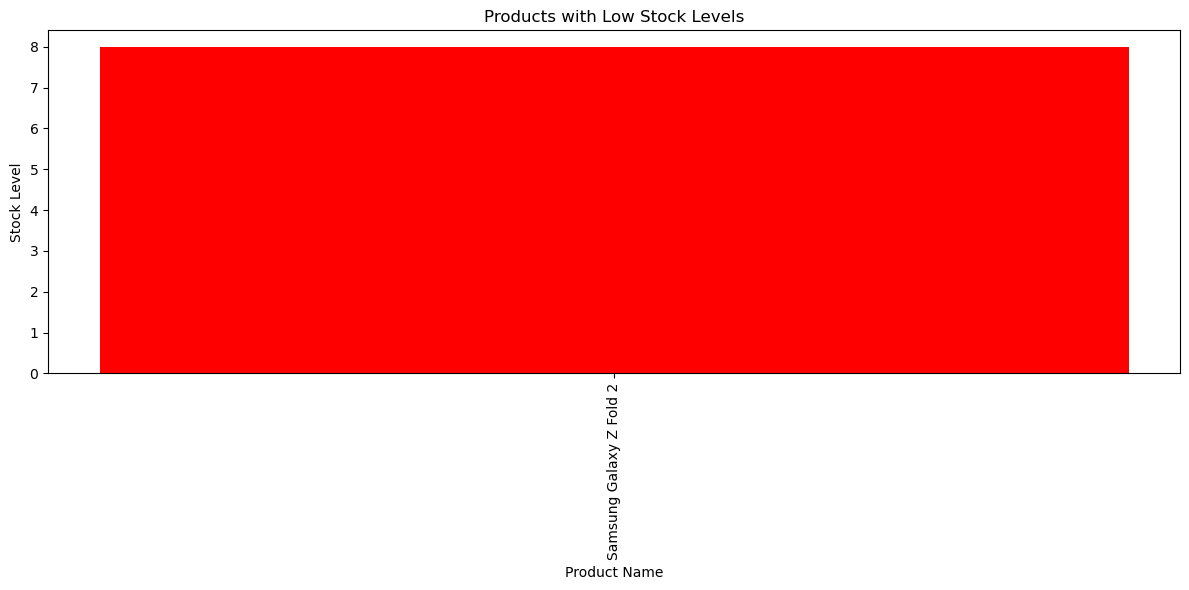

In [79]:

# Define a threshold for low stock levels
low_stock_threshold = 10
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]
plt.figure(figsize=(12, 6))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='red')
plt.title('Products with Low Stock Levels')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()


Average Selling Price: 385.99
Maximum Selling Price: 1799.99
Minimum Selling Price: 9.99


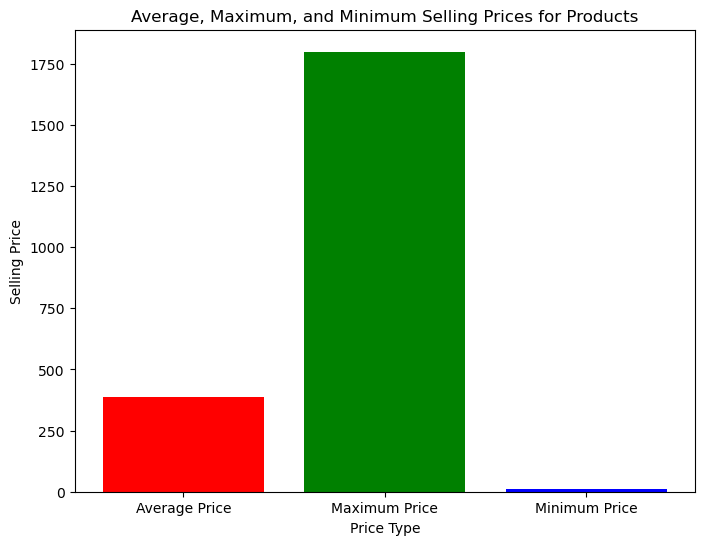

In [85]:
# Calculate the average, maximum, and minimum selling prices
average_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()
# Print the calculated values
print(f"Average Selling Price: {average_price:.2f}")
print(f"Maximum Selling Price: {max_price:.2f}")
print(f"Minimum Selling Price: {min_price:.2f}")
# Data for the bar graph
prices = [average_price, max_price, min_price]
price_labels = ['Average Price', 'Maximum Price', 'Minimum Price']
plt.figure(figsize=(8, 6))
plt.bar(price_labels, prices, color=['red', 'green', 'blue'])
plt.title('Average, Maximum, and Minimum Selling Prices for Products')
plt.xlabel('Price Type')
plt.ylabel('Selling Price')
plt.show()


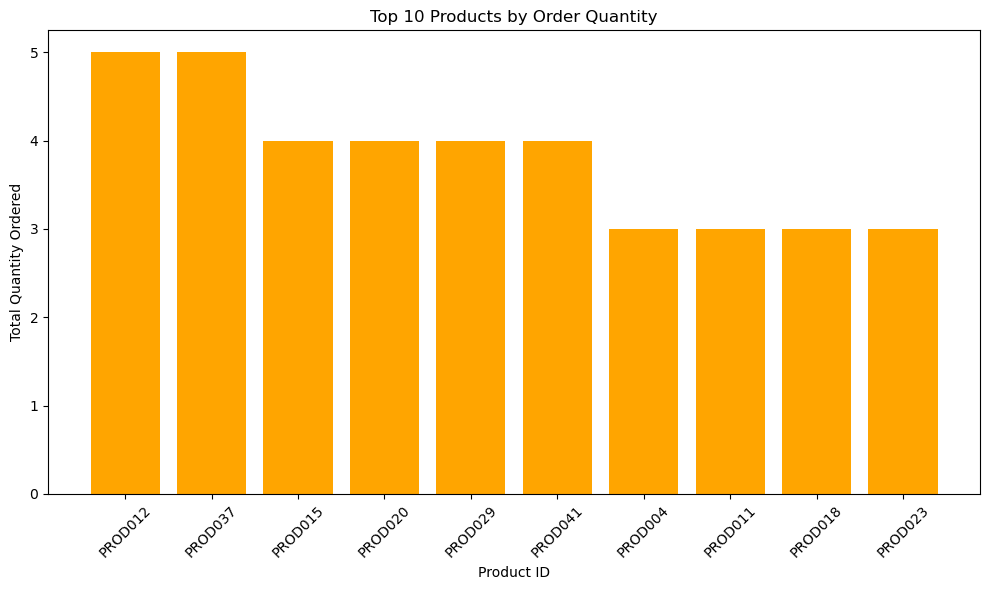

In [87]:

# Calculate the total quantity ordered for each product
product_order_quantities = order_data.groupby('product_id')['quantity'].sum()
top_10_products = product_order_quantities.nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products.index, top_10_products.values, color='orange')
plt.title('Top 10 Products by Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


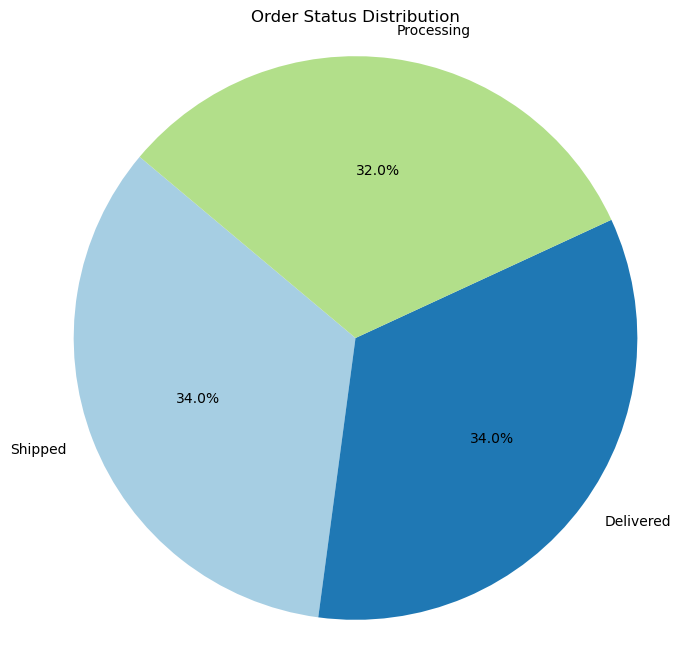

In [89]:
# Calculate the distribution of order status
order_status_distribution = order_data['order_status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_status_distribution, labels=order_status_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(order_status_distribution))))
plt.title('Order Status Distribution')
plt.axis('equal') 
plt.show()


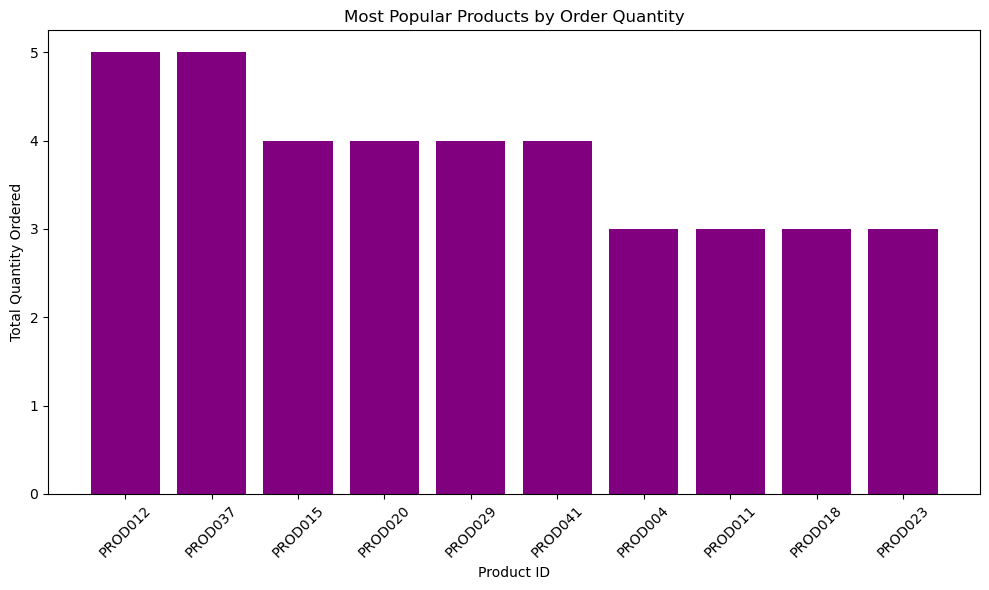

In [91]:
# Calculate the total quantity ordered for each product
product_order_quantities = order_data.groupby('product_id')['quantity'].sum()
# Identify the most popular products by order quantity (top 10)
most_popular_products = product_order_quantities.nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(most_popular_products.index, most_popular_products.values, color='purple')
plt.title('Most Popular Products by Order Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


product_id
PROD001     699.99
PROD002    1599.98
PROD003     899.99
PROD004     899.97
PROD005     999.99
PROD006     259.98
PROD007     159.99
PROD008     499.99
PROD009     499.99
PROD010     999.99
PROD011     149.97
PROD012      49.95
PROD013     699.98
PROD014     249.99
PROD015     319.96
PROD016    1299.99
PROD017    1199.98
PROD018     389.97
PROD019     649.99
PROD020     159.96
PROD021     349.99
PROD022    1099.98
PROD023     389.97
PROD024     199.98
PROD025     219.99
PROD026     299.99
PROD027    1199.98
PROD028     179.97
PROD029     159.96
PROD030     159.98
PROD031     399.99
PROD032     159.98
PROD033      74.99
PROD034     599.99
PROD035     849.99
PROD036    2399.98
PROD037     124.95
PROD038     349.99
PROD039     359.97
PROD040     179.98
PROD041      79.96
PROD042      89.99
PROD043      79.98
PROD044     379.99
PROD045    1799.99
PROD046     239.98
PROD047      59.97
PROD048     109.99
PROD049     899.99
PROD050     299.98
Name: total_revenue, dtype: float64


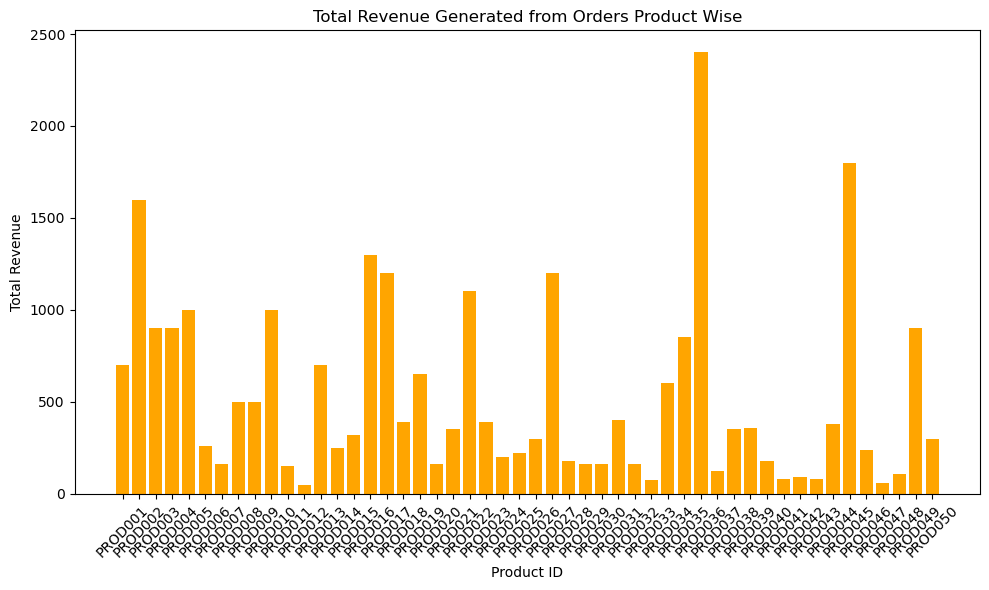

In [95]:

order_data = pd.merge(order_data, product_data[['product_id', 'selling_price']], on='product_id')
order_data['total_revenue'] = order_data['quantity'] * order_data['selling_price']
total_revenue_product_wise = order_data.groupby('product_id')['total_revenue'].sum()
print(total_revenue_product_wise)
plt.figure(figsize=(10, 6))
plt.bar(total_revenue_product_wise.index, total_revenue_product_wise.values, color='orange')
plt.title('Total Revenue Generated from Orders Product Wise')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


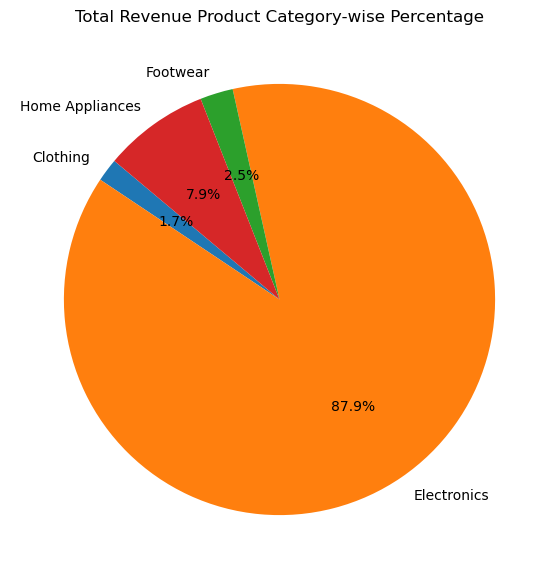

In [97]:
#Total revenue product category-wise percentage
merged_data = pd.merge(order_data, product_data, on='product_id')
category_revenue = merged_data.groupby('category')['total_price'].sum()
category_revenue_percentage = (category_revenue / category_revenue.sum()) * 10
plt.figure(figsize=(10, 7))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue Product Category-wise Percentage')
plt.show()



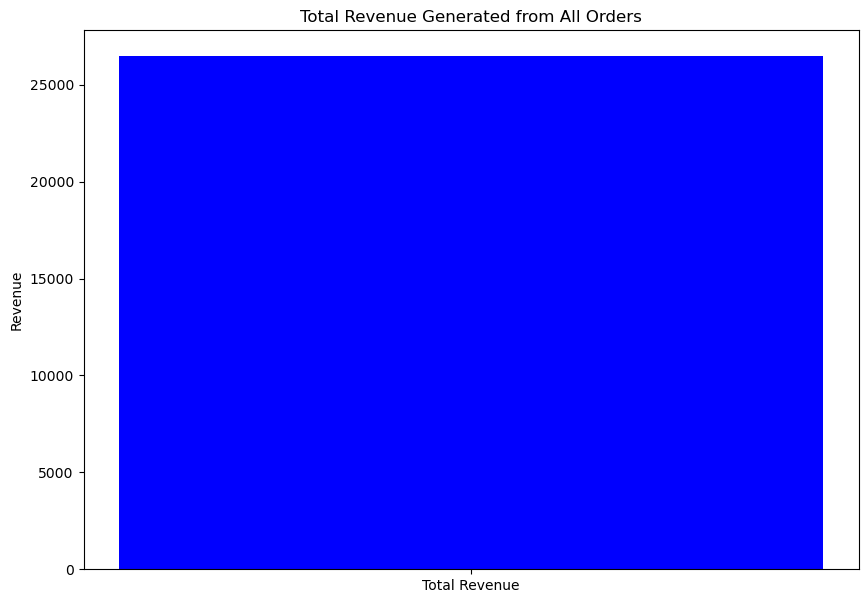

In [99]:
# Calculate the total revenue
total_revenue = order_data['total_price'].sum()
plt.figure(figsize=(10, 7))
plt.bar(['Total Revenue'], [total_revenue], color='blue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Revenue')
plt.show()


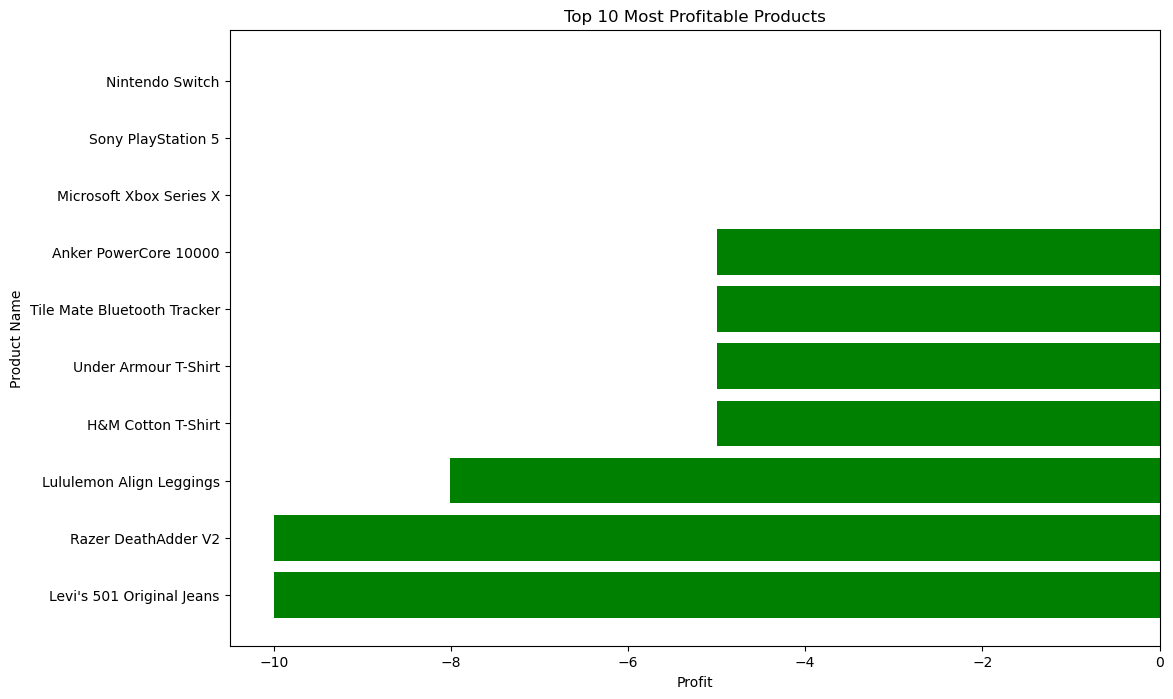

In [101]:
# Calculate profit for each product
product_data['profit'] = product_data['selling_price'] - product_data['original_price']
# Sort products by profit in descending order and select the top 10
top_profitable_products = product_data.sort_values(by='profit', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_profitable_products['product_name'], top_profitable_products['profit'], color='green')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Top 10 Most Profitable Products')
plt.gca().invert_yaxis()  
plt.show()


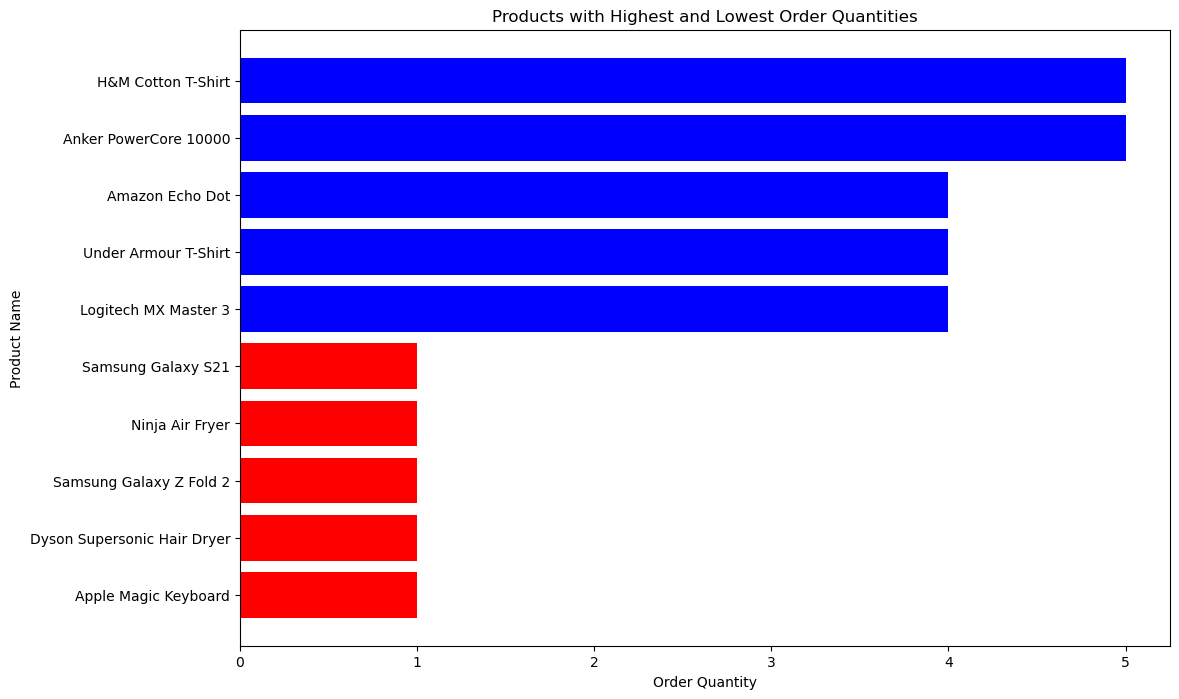

In [105]:

# Aggregate order quantities by product_id
product_order_quantity = order_data.groupby('product_id')['quantity'].sum().reset_index()
product_order_quantity = pd.merge(product_order_quantity, product_data[['product_id', 'product_name']], on='product_id')
most_ordered = product_order_quantity.sort_values(by='quantity', ascending=False).head(5)
least_ordered = product_order_quantity.sort_values(by='quantity', ascending=True).head(5)
combined_order_data = pd.concat([most_ordered, least_ordered])
plt.figure(figsize=(12, 8))
plt.barh(combined_order_data['product_name'], combined_order_data['quantity'], color=['blue' if x in most_ordered['product_name'].values else 'red' for x in combined_order_data['product_name']])
plt.xlabel('Order Quantity')
plt.ylabel('Product Name')
plt.title('Products with Highest and Lowest Order Quantities')
plt.gca().invert_yaxis()  
plt.show()


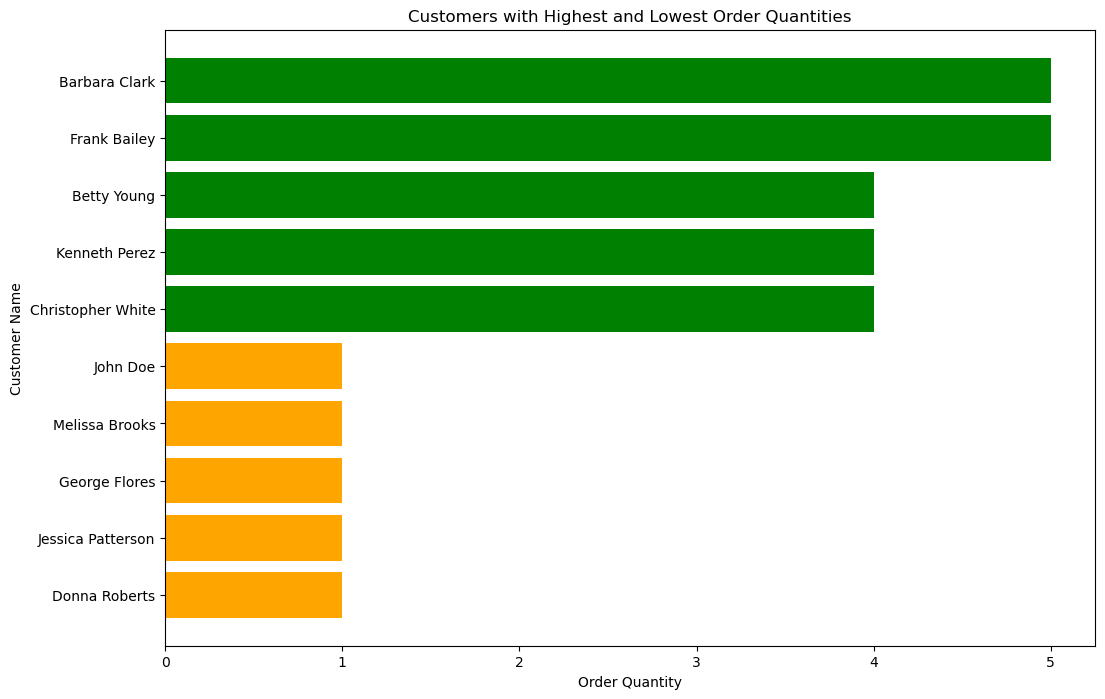

In [107]:
# Aggregate order quantities by customer_id
customer_order_quantity = order_data.groupby('customer_id')['quantity'].sum().reset_index()
customer_order_quantity = pd.merge(customer_order_quantity, customer_data[['customer_id', 'name']], on='customer_id')
most_ordered_customers = customer_order_quantity.sort_values(by='quantity', ascending=False).head(5)
least_ordered_customers = customer_order_quantity.sort_values(by='quantity', ascending=True).head(5)

# Combine most and least ordered for plotting
combined_customer_data = pd.concat([most_ordered_customers, least_ordered_customers])
plt.figure(figsize=(12, 8))
plt.barh(combined_customer_data['name'], combined_customer_data['quantity'], color=['green' if x in most_ordered_customers['name'].values else 'orange' for x in combined_customer_data['name']])
plt.xlabel('Order Quantity')
plt.ylabel('Customer Name')
plt.title('Customers with Highest and Lowest Order Quantities')
plt.gca().invert_yaxis()  
plt.show()


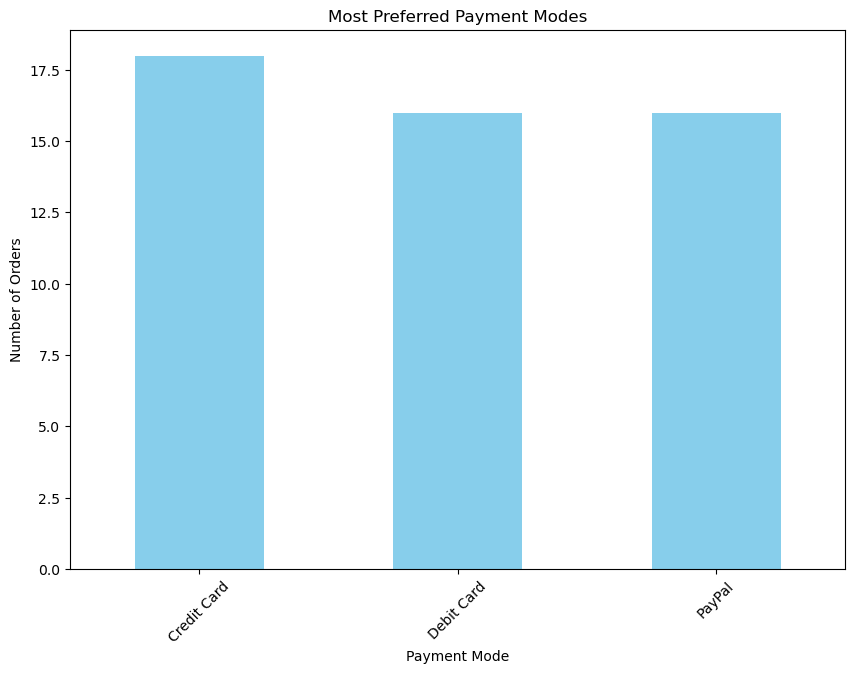

In [109]:
# Count the occurrences of each payment mode
payment_mode_counts = order_data['payment_mode'].value_counts()
plt.figure(figsize=(10, 7))
payment_mode_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Most Preferred Payment Modes')
plt.xticks(rotation=45)
plt.show()


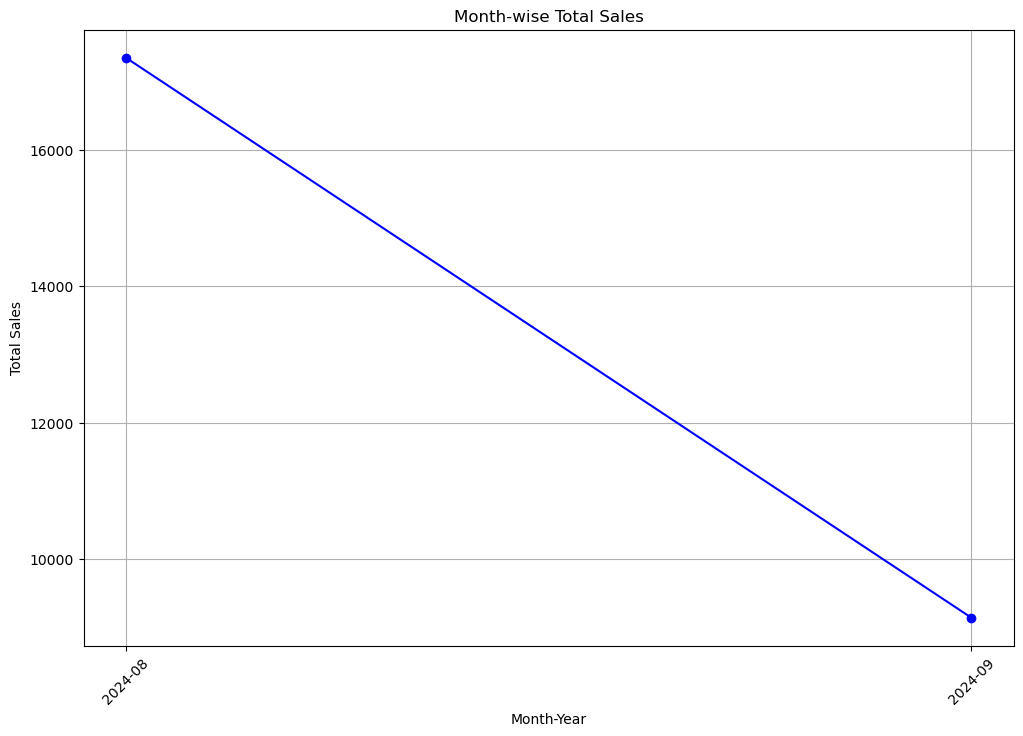

In [111]:

# Assuming order_data DataFrame is already retrieved from the database
order_data['order_date'] = pd.to_datetime(order_data['order_date']
order_data['month_year'] = order_data['order_date'].dt.to_period('M')
monthly_sales = order_data.groupby('month_year')['total_price'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


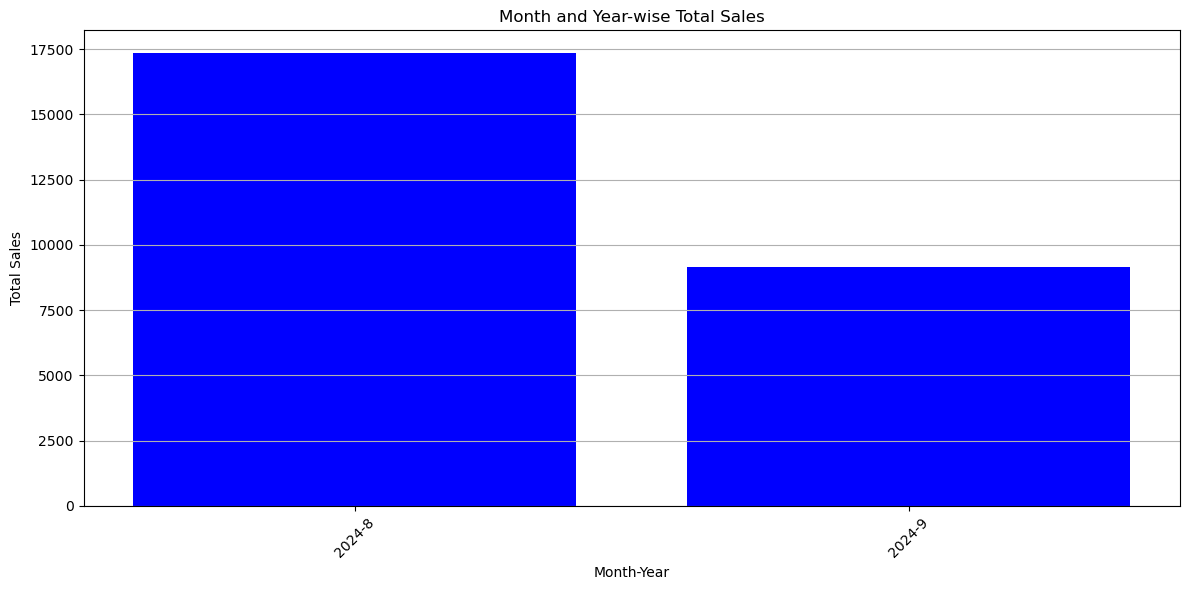

In [123]:
# Convert 'order_date' to datetime format if not already done
order_data['order_date'] = pd.to_datetime(order_data['order_date'])
# Extract 'year' and 'month' from 'order_date'
order_data['year'] = order_data['order_date'].dt.year
order_data['month'] = order_data['order_date'].dt.month
# Group by 'year' and 'month' and sum the 'total_price'
monthly_sales = order_data.groupby(['year', 'month'])['total_price'].sum().reset_index()
# Create a 'month_year' column for better labeling in the plot
monthly_sales['month_year'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month_year'], monthly_sales['total_price'], color='blue')
plt.xticks(rotation=45)
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

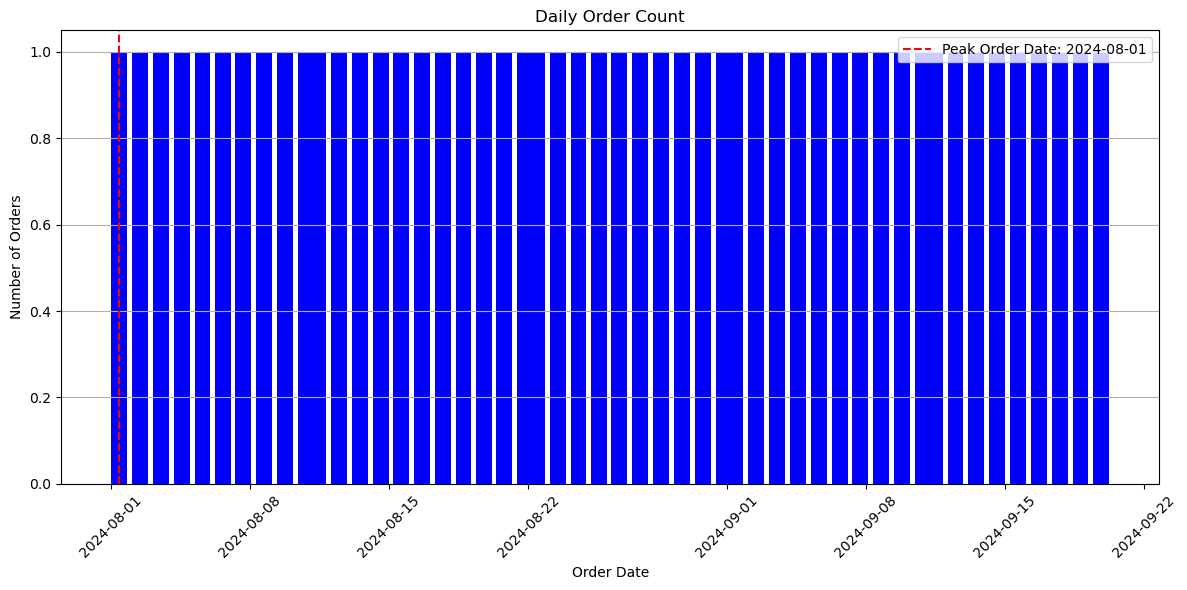

Peak Order Date: 2024-08-01, Number of Orders: 1


In [125]:

# Convert 'order_date' to datetime format if not already done
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Group by 'order_date' and count the number of orders for each date
daily_orders = order_data.groupby('order_date')['order_id'].count().reset_index()
daily_orders.columns = ['order_date', 'order_count']
peak_order_date = daily_orders.loc[daily_orders['order_count'].idxmax()]
plt.figure(figsize=(12, 6))
plt.bar(daily_orders['order_date'], daily_orders['order_count'], color='blue')
plt.axvline(x=peak_order_date['order_date'], color='red', linestyle='--', label=f'Peak Order Date: {peak_order_date["order_date"].date()}')
plt.xticks(rotation=45)
plt.title('Daily Order Count')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print(f"Peak Order Date: {peak_order_date['order_date'].date()}, Number of Orders: {peak_order_date['order_count']}")


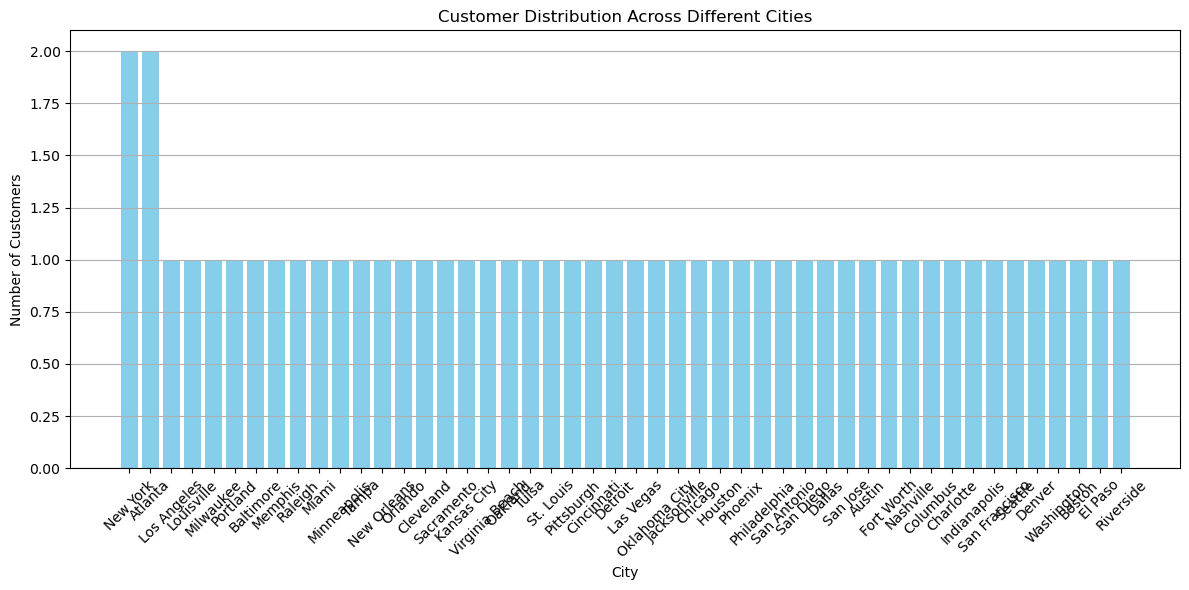

In [129]:
# Group by 'city' and count the number of customers in each city
customer_distribution = customer_data['city'].value_counts().reset_index()
customer_distribution.columns = ['city', 'customer_count']
plt.figure(figsize=(12, 6))
plt.bar(customer_distribution['city'], customer_distribution['customer_count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Customer Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

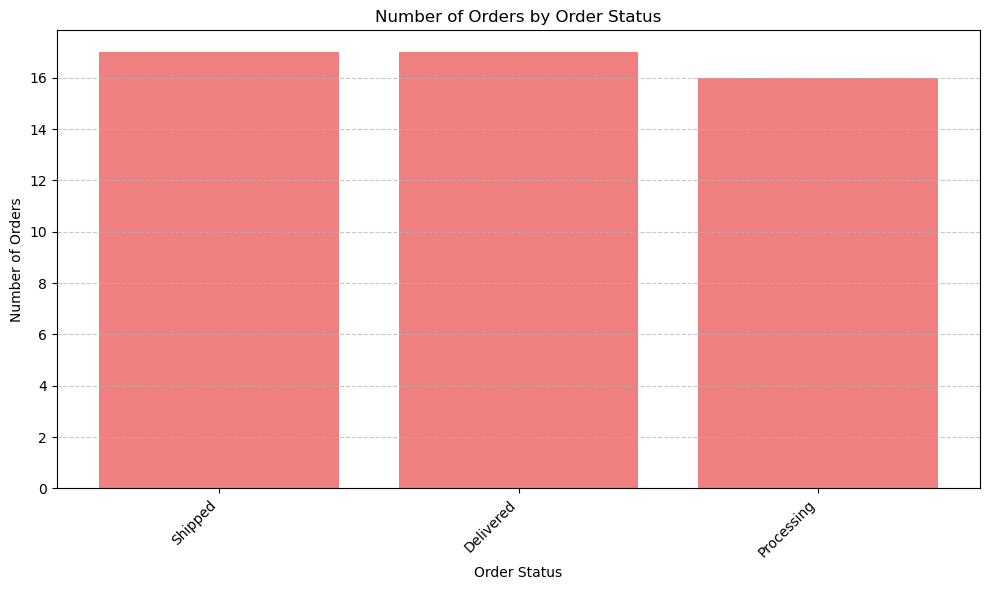

In [139]:
orders_by_status = order_data['order_status'].value_counts().reset_index()
orders_by_status.columns = ['order_status', 'number_of_orders']
plt.figure(figsize=(10, 6))
plt.bar(orders_by_status['order_status'], orders_by_status['number_of_orders'], color='lightcoral')
plt.title('Number of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()